In [1]:
state_wheather = ("sunny", "cloudy", "rainy")

In [36]:
import numpy as np
transition_matrix = np.array(((0.6, 0.3, 0.1),
                              (0.3, 0.4, 0.3),
                              (0.2, 0.3, 0.5)))

Задание 1. Выберите произвольное начальное состояние и смоделируйте 20000 последующих состояний в цепи Маркова с введенной выше матрицей переходов. Результат моделирования (массив размера 20000) запишите в переменную states.

In [20]:
import random as rm
transitionName = [["SS","SC","SR"],["CS","CC","CR"],["RS","RC","RR"]]
wheather_today = np.random.choice(state_wheather)
states = []
states.append(wheather_today)
prob = 1
for i in range (1,20000):
        if wheather_today == "sunny":
            change = np.random.choice(transitionName[0],replace=True,p=transition_matrix[0])
            if change == "SS":
                prob = prob * 0.6
                states.append("sunny")
                pass
            elif change == "SC":
                prob = prob * 0.3
                wheather_today = "cloudy"
                states.append("cloudy")
            else:
                prob = prob * 0.1
                wheather_today = "rainy"
                states.append("rainy")
        elif wheather_today == "cloudy":
            change = np.random.choice(transitionName[1],replace=True,p=transition_matrix[1])
            if change == "CC":
                prob = prob * 0.4
                states.append("cloudy")
                pass
            elif change == "CS":
                prob = prob * 0.3
                wheather_today = "sunny"
                states.append("sunny")
            else:
                prob = prob * 0.3
                wheather_today = "rainy"
                states.append("rainy")
        elif wheather_today == "rainy":
            change = np.random.choice(transitionName[2],replace=True,p=transition_matrix[2])
            if change == "RR":
                prob = prob * 0.3
                states.append("rainy")
                pass
            elif change == "RS":
                prob = prob * 0.2
                wheather_today = "sunny"
                states.append("sunny")
            else:
                prob = prob * 0.5
                wheather_today = "cloudy"
                states.append("cloudy")
print(states)

['rainy', 'rainy', 'rainy', 'rainy', 'rainy', 'rainy', 'sunny', 'sunny', 'sunny', 'sunny', 'sunny', 'cloudy', 'cloudy', 'cloudy', 'rainy', 'cloudy', 'sunny', 'cloudy', 'cloudy', 'rainy', 'cloudy', 'rainy', 'rainy', 'cloudy', 'cloudy', 'cloudy', 'sunny', 'sunny', 'sunny', 'cloudy', 'rainy', 'rainy', 'cloudy', 'sunny', 'rainy', 'rainy', 'rainy', 'cloudy', 'cloudy', 'rainy', 'sunny', 'rainy', 'sunny', 'sunny', 'sunny', 'rainy', 'rainy', 'cloudy', 'rainy', 'cloudy', 'rainy', 'rainy', 'rainy', 'cloudy', 'sunny', 'sunny', 'sunny', 'sunny', 'cloudy', 'rainy', 'rainy', 'rainy', 'rainy', 'cloudy', 'rainy', 'rainy', 'rainy', 'rainy', 'cloudy', 'rainy', 'rainy', 'cloudy', 'cloudy', 'cloudy', 'cloudy', 'rainy', 'rainy', 'rainy', 'rainy', 'rainy', 'cloudy', 'cloudy', 'rainy', 'rainy', 'cloudy', 'cloudy', 'sunny', 'cloudy', 'cloudy', 'sunny', 'sunny', 'sunny', 'sunny', 'cloudy', 'sunny', 'sunny', 'sunny', 'sunny', 'sunny', 'cloudy', 'rainy', 'rainy', 'rainy', 'rainy', 'rainy', 'cloudy', 'rainy', 'ra

Задание 2. На основе массива states рассчитайте, как меняется частота встречаемости каждого из типов погоды в массиве states[:n] для n, возрастающих от 1 до 20000. На одном рисунке покажите 3 графика: по оси х откладывайте n, по у - частоту для каждого из трех типов погоды.

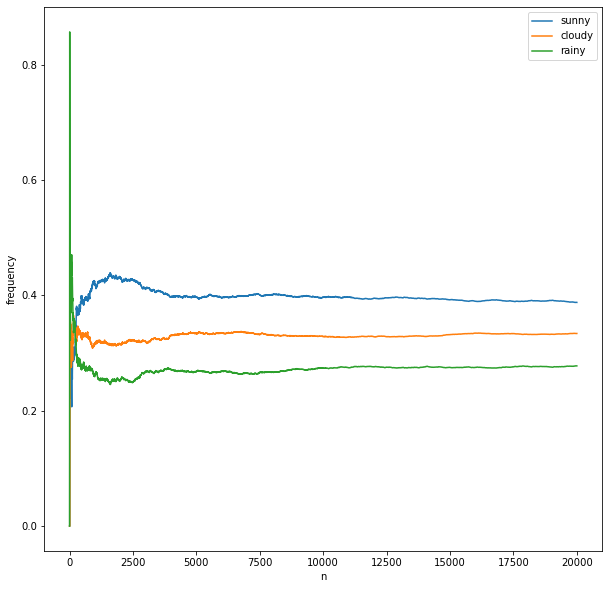

In [37]:
import pandas as pd
import matplotlib.pyplot as plt

x=np.arange(20000)
freq_list1=[]
freq_list2=[]
freq_list3=[]
for i in range (0,20000):
    for q in state_wheather:
        if q=="sunny":
            freq_list1.append((states[0:i:1].count(q))/(i+1))
        if q=="cloudy":
            freq_list2.append((states[0:i:1].count(q))/(i+1))
        if q=="rainy":
            freq_list3.append((states[0:i:1].count(q))/(i+1))
plt.figure(figsize=(10, 10))
plt.plot(x,freq_list1,label="sunny")
plt.plot(x,freq_list2,label="cloudy")
plt.plot(x,freq_list3,label="rainy")
plt.legend()
plt.xlabel('n')
plt.ylabel('frequency')
plt.show()

Задание 3. Как следует из картинки, частоты сходятся к некоторым стационарным значениям. Убедитесь, что эти значения совпадают с решением уравнения на стационарную плотность πP=π, где P - это матрица переходных вероятностей (transition_matrix), а вектор π - искомая стационарная плотность. Дополнительно убедитесь, это этот же вектор возникает в строках матрицы P, при возведении ее во все большие степени.

In [49]:
pi = []
pi.append(freq_list1[19999])
pi.append(freq_list2[19999])
pi.append(freq_list3[19999])
r=[]
for i in range (1,4):
    P=np.linalg.matrix_power(transition_matrix, i)
    result=P.dot(pi)
    for j in range (0,3):
        r.append(result[j]-pi[j])
    print(r)
    r=[]

[-0.027185000000000015, -0.0007049999999999557, 0.03890500000000002]
[-0.03981699999999999, 0.0025290000000000035, 0.052709000000000006]
[-0.04504560000000002, 0.004174200000000017, 0.05805480000000002]


Итак, мы сделали проверку для матрицы в первой степени, во второй и в третьей. Как мы видим, погрешность очень мала. Поэтому с учетом погрешности уравнение действительно выполняется.

Задание 4. Примените алгоритм Metropolis для генерации выборки из смеси двух гауссиан. Плотность смеси задается в виде p(x) = 0.3N(-4, 2) + 0.7N(3, 6), где N(a, b) - плотность нормального распределения со средним a и дисперсией b. Для наглядности, ниже приведен график плотности смеси. Покажите, что гистограмма, построенная по выборке, приближает заданную плотность смеси.

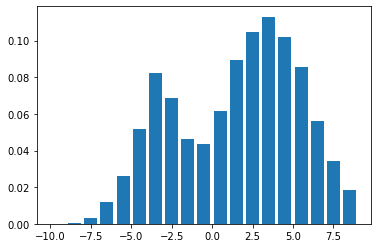

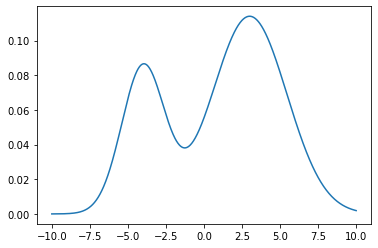

In [74]:
from scipy.stats import norm
q = np.arange(-10,10)
def metroplis(start, value, proposal, niter, nburn=0, **kwargs):
  
    current = start
    post = [current]
    for i in range(niter):
        proposed = proposal(current, **kwargs)
        p = value(proposed, **kwargs) / value(current, **kwargs)
        if np.random.rand() < p:
            current = proposed
        post.append(current)
    return post[nburn:]

value = lambda x: 0.3*norm(-4, np.sqrt(2)).pdf(x) + 0.7*norm(3, np.sqrt(6)).pdf(x)
proposal = lambda x: (x + np.random.choice([-1, 1])+10)%21-10
post = metroplis(1, value, proposal, 10000)

plt.hist(post, bins=np.arange(-10,10), rwidth=0.8, density=True)

plt.show()

x = np.linspace(-10, 10, 1000)
y = 0.3*norm(-4, np.sqrt(2)).pdf(x) + 0.7*norm(3, np.sqrt(6)).pdf(x)

plt.plot(x, y)
plt.show()